In [2191]:
from data_loader import load_latest_iteration, find_latest_vtu_files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2192]:
mode = "hard"
FOLDER = f"../demo/cpp/hard/build/src/vtk_output_{mode}/data"

data = load_latest_iteration(FOLDER)

Latest iteration 0 is not the same as the global latest iteration 645


In [2193]:
data.keys()

dict_keys(['domain', 'constraints', 'particles', 'simulation', 'parameters'])

In [2194]:
particles = data["particles"]
parameters = data["parameters"]












In [2195]:
params = data["parameters"]
params

,dt_s,end_time,log_frequency_seconds,min_box_size_x,min_box_size_y,min_box_size_z,xi,TAU,l0,LAMBDA,...,max_bbpgd_iterations,max_recursive_iterations,linked_cell_size,growth_factor,particle_preallocation_factor,mode,x,y,z,rank
0,5.0,42000.0,60.0,2.0,2.0,0.0,720000.0,3240.0,1.0,0.00244,...,100000,50,2.2,1.5,12.0,0,NaN,NaN,NaN,0


In [2196]:
particles.describe()

,gid,quaternion_x,quaternion_y,quaternion_z,quaternion_w,orientation_x,orientation_y,orientation_z,lengths_x,lengths_y,...,velocity_linear_x,velocity_linear_y,velocity_linear_z,velocity_angular_x,velocity_angular_y,velocity_angular_z,rank,x,y,z
count,886.000000,886.000000,886.0,886.0,886.000000,886.000000,886.000000,886.0,886.000000,886.0,...,886.000000,8.860000e+02,886.0,886.0,886.0,886.000000,886.000000,886.000000,886.000000,886.0
mean,464.500000,0.786817,0.0,0.0,0.338568,0.361229,0.403659,0.0,1.386812,0.5,...,0.000007,-1.566323e-06,0.0,0.0,0.0,0.000008,6.791196,0.432374,0.098538,0.0
std,255.910466,0.248199,0.0,0.0,0.452757,0.594943,0.594487,0.0,0.283655,0.0,...,0.000196,1.840399e-04,0.0,0.0,0.0,0.000776,3.742015,7.478469,6.758527,0.0
min,22.000000,-0.370646,0.0,0.0,-0.999995,-0.999999,-0.999886,0.0,1.004250,0.5,...,-0.000595,-5.468640e-04,0.0,0.0,0.0,-0.003365,1.000000,-13.336300,-13.435200,0.0
25%,243.250000,0.687936,0.0,0.0,0.020792,-0.053489,0.001755,0.0,1.152295,0.5,...,-0.000126,-1.210885e-04,0.0,0.0,0.0,-0.000352,4.000000,-5.807260,-5.465255,0.0
50%,464.500000,0.869411,0.0,0.0,0.390066,0.511752,0.620094,0.0,1.321630,0.5,...,0.000009,1.865135e-07,0.0,0.0,0.0,0.000007,7.000000,0.407969,0.096642,0.0
75%,685.750000,0.968026,0.0,0.0,0.701294,0.874149,0.913773,0.0,1.593533,0.5,...,0.000128,1.265408e-04,0.0,0.0,0.0,0.000404,9.000000,6.486778,5.660947,0.0
max,907.000000,1.000000,0.0,0.0,1.000000,0.999999,0.999961,0.0,2.000000,0.5,...,0.000584,7.276720e-04,0.0,0.0,0.0,0.004318,14.000000,15.544600,13.071500,0.0


In [2197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress

In [2198]:
bin_centers, avg_length, wavelength_fft = wavelength.comprehensive_wavelength_analysis(
    particles, plot=False)


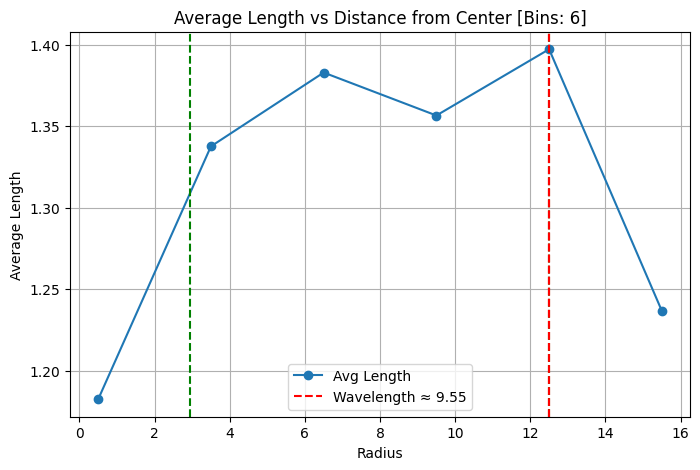

In [2199]:
bin_centers, avg_length, wavelength_fft = wavelength.comprehensive_wavelength_analysis(
    particles)

plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_length, "o-", label="Avg Length")
plt.xlabel("Radius")
plt.ylabel("Average Length")
plt.title(f"Average Length vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)

# place vertical lines at multiples of wavelength
first_peak = bin_centers[np.argmax(avg_length)]
max_radius = bin_centers.max()

for direction, color in [(+1, "r"), (-1, "g")]:
    current = first_peak
    while 0 < current < max_radius:
        plt.axvline(current, color=color, linestyle="--")
        current += direction * wavelength_fft

# add one legend entry for wavelength
plt.axvline(first_peak, color="r", linestyle="--",
            label=f"Wavelength ≈ {wavelength_fft:.2f}")

plt.legend()
plt.show()

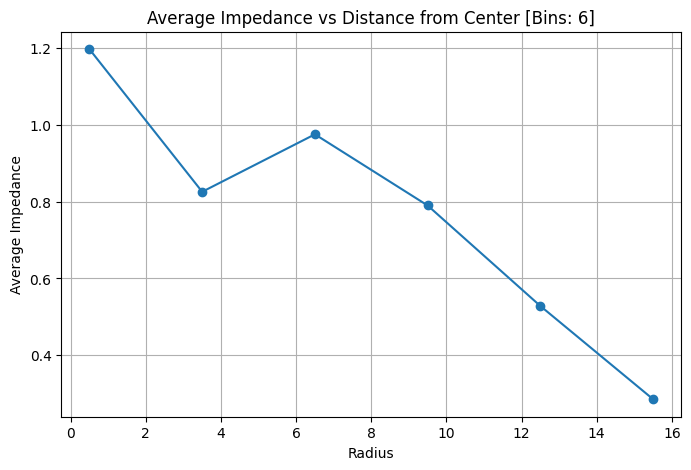

In [2200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength
import stress


bin_centers, avg_impedance = stress.stress_distribution(particles)


plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_impedance, "o-", label="Avg Impedance")
plt.xlabel("Radius")
plt.ylabel("Average Impedance")
plt.title(
    f"Average Impedance vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)